For bounded operators $\left\{\hat{A}_{j}:1\le j \le p\right\}$, the following relation

$$
e^{\hat{A}_1+\hat{A}_2 + \cdots \hat{A}_p} = \lim_{m \rightarrow \infty} \left(e^{\hat{A}_1/m} e^{\hat{A}_2/m} \cdots e^{\hat{A}_p/m}\right)^m
$$

is satisfied with the correction of the order of $m^{-1}$. This equation, also known as the <i>generalized Trotter's formula</i> [<a href="http://link.springer.com/10.1007/BF01609348">1</a>, <a href="http://www.ams.org/jourcgi/jour-getitem?pii=S0002-9939-1959-0108732-6">2</a>], has been used as a key method of employing Monte Carlo simulation for quantum systems. We apply this formula to the time-evolution of a quantum system under total Hamiltonian for different values of positive integers $m$.

That is, we seek to find the way of treating the time-evolution of a system under total Hamiltonian $\hat{H} = \hat{H}_1 + \hat{H}_2 + \cdots + \hat{H}_p$ as applying short pulsed sequences $\Delta T = T/m$ of decomposed Hamiltonians $\hat{H}_{j}$ in a specific order. To do so, we define the time-evolution operator $\hat{U}$ and its approximant $\hat{\mathscr{U}}_m$ for an integer $m$ as

$$
\hat{U}(T) = e^{-i(\hat{H}_1 + \hat{H}_2 + \cdots + \hat{H}_p)T/\hbar},
\\
\hat{\mathscr{U}}_m(T) = (e^{-i \hat{H}_1 T/m\hbar} e^{-i \hat{H}_2 T/m\hbar} \cdots e^{-i \hat{H}_p T/m\hbar})^m.
$$

It is clear from the generalized Trotter's formula that $\hat{U}(T) = \lim_{m\rightarrow\infty} \hat{\mathscr{U}}_m (T)$.

To quantify the error of this approximation, it is natural to investigate the overlap between two states:


$$U |i \rangle = e^{-i (H_1 + H_2+ \cdots H_n) t/\hbar}|i\rangle  \quad \textrm{and}\quad \tilde{U}_m |i\rangle =(e^{-i H_1 t/m\hbar} e^{-i H_2 t/m\hbar}\cdots e^{-i H_n t/m\hbar})^m |i\rangle,$$

which are the states obtained by time-evolution and the corresponding approximated time-evolution. If the approximation holds, the overlap $\left|\langle i | \tilde{U}_m^\dagger U | i \rangle\right|$between the two aforementioned states, also known as the <i>fidelity</i> [3], would be close to 1.

As the simplest example, we consider the Rabi model, which describes an interaction of a two-level atom and a quantized mode of an optical cavity. The Hamiltonian is of the form:

$$
\hat{H} = \frac{1}{2} \hbar \Omega \hat{\sigma}_z + \hbar \omega \hat{a}^\dagger \hat{a} + \hbar g (\hat{\sigma}_+ + \hat{\sigma}_-) (\hat{a}^\dagger + \hat{a})
$$

Here, $\hat{\sigma}_z = \left| e \right>\left< e \right|-\left| g \right>\left< g \right|$ where $\left|e\right>$ and $\left|g\right>$ are the excited and the ground states of the two-level atom, respectively. This model is different from the Jaynes-Cummings model in which we neglect the counter-rotating terms $\hat{\sigma}_+ \hat{a}^\dagger$ and $\hat{\sigma}_- \hat{a}$.

We decompose the total Hamiltonian into two parts: 

$$
H_1 = \frac{1}{2}\hbar \Omega \sigma_z + \hbar g (\sigma_+ a^\dagger + \sigma_- a),\quad H_2 = \hbar \omega a^\dagger a + \hbar g (\sigma_+ a + \sigma_- a^\dagger).
$$

It is clear that the two Hamiltonians $H_1$ and $H_2$ does not commute, so that we CANNOT claim that $U =  \tilde{U}_m$.

In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import rcParams
%matplotlib inline
rcParams.update({'font.size': 15, 'text.usetex': True})

In [3]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [4]:
# make qutip available in the rest of the notebook
from qutip import *

In [5]:
T = 10
dT = 2e-2

In [6]:
T_list = np.arange(0, T, dT)

$\Omega/2\pi =\omega/2\pi= 1 \textrm{ Hz},\quad  g/2\pi= 0.05 \textrm{ Hz}$

Suppose that the atom is initially in the excited state, while there is no cavity photon existent in the beginning. $|i\rangle \equiv |0, e\rangle$

In [7]:
N = 15         # number of cavity fock states
# intial state
psi0 = tensor(basis(N,0), basis(2,0))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), sigmam())
sz = tensor(qeye(N), sigmaz())

In [8]:
def U(H, T):
    return (-1j * H * T).expm()

def U_approx(H_list, m, T):
    mult = 1
    for idx in range(len(H_list)):
        mult = mult * (-1j * H_list[-1-idx] * T / m).expm()
    return mult ** m

In [9]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into two parts:
H_list = [wc * a.dag() * a + g * (a.dag() * sm.dag() + a * sm),
          0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [10]:
M = 50
m_list = range(1, M+1)

In [11]:
overlap = np.zeros(M)

for idx, m in enumerate(range(1, M+1)):
    overlap[idx] = fidelity(U_approx(H_list, m, T) * psi0,
                            U(H, T) * psi0)

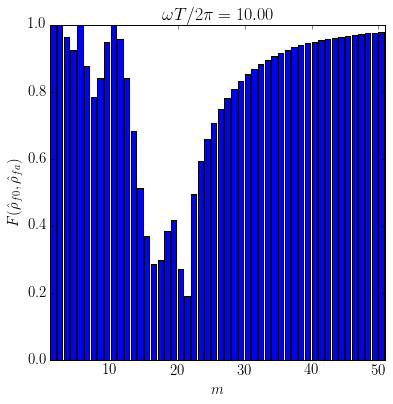

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.bar(range(1, M + 1), overlap)
ax.set_xlim([1, M + 1])
ax.set_ylim([0, 1])

ax.set_xlabel('$m$')
ax.set_ylabel(r'$F(\hat{\rho}_{f0}, \hat{\rho}_{fa})$');
ax.set_title(r'$\omega T/2\pi = %.2f$' % T);

In [13]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(m_list), len(T_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_approx(H_list, m, T) * psi0
        rho_0f = U(H, T) * psi0
        Z[i1, i2] = fidelity(rho_af, rho_0f)

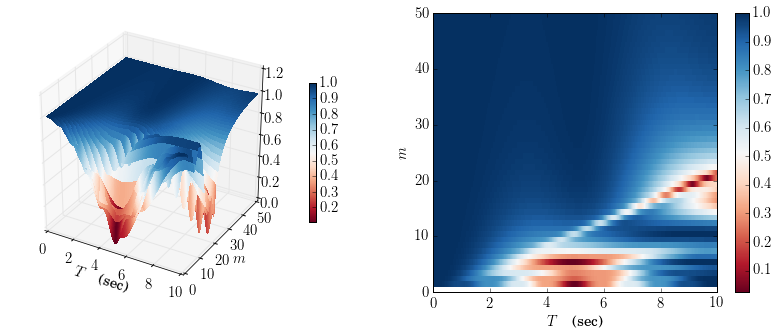

In [14]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$T \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$T \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

In [43]:
T_m_list = np.arange(0, 2, 2e-2)

X, Y = np.meshgrid(m_list, T_m_list)
Z = np.zeros((len(m_list), len(T_m_list)))

for i1, m in enumerate(m_list):
    for i2, T_m in enumerate(T_m_list):
        T = m * T_m
        rho_af = U_approx(H_list, m, T) * psi0
        rho_0f = U(H, T) * psi0
        Z[i1, i2] = fidelity(rho_af, rho_0f)

In [42]:
for i2, T_m in enumerate(T_m_list):
    if all(Z[:, i2] > 0.99):
        print(i2, T_m)

0 0.0
1 0.02
2 0.04
3 0.06
4 0.08


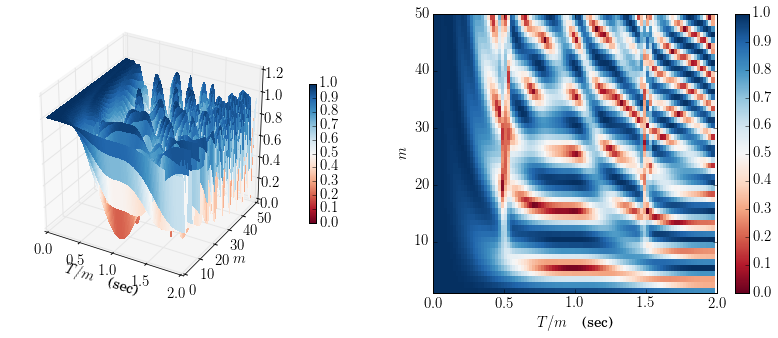

In [19]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu,
                     linewidth=0, antialiased=False, vmin=0, vmax=1)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$T/m \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=0, vmax=1)
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$T/m \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$')
ax1.set_ylim([1, 50]);

$g = 0.1\omega$

In [14]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into two parts:
H_list = [wc * a.dag() * a + g * (a.dag() * sm.dag() + a * sm),
          wa * sm.dag() * sm + g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [15]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

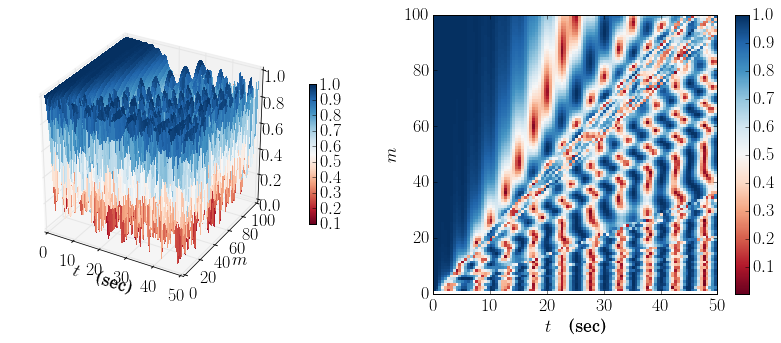

In [16]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

$g = 0.2 \omega$

In [17]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.2 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into two parts:
H_list = [wc * a.dag() * a + g * (a.dag() * sm.dag() + a * sm),
          wa * sm.dag() * sm + g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [18]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

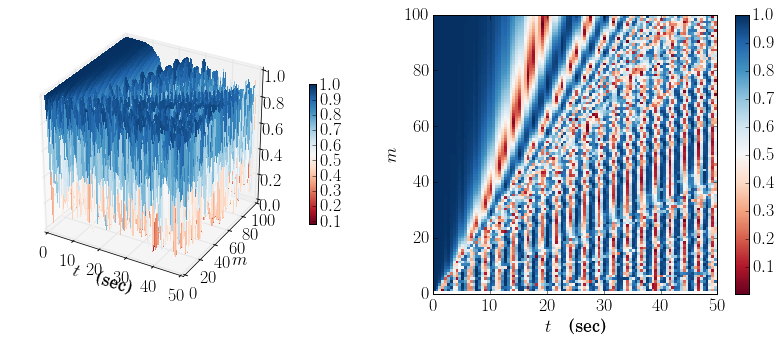

In [19]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

t/m vs. t

### Decomposition in different ways

This time, we decompose the Rabi Hamiltonian into three parts which do not (apparently) commute with each other.

$$
H = H_1 + H_2 + H_3
$$

$$H_1 = \frac{1}{2} \hbar \Omega \sigma_z + \hbar \omega a^\dagger a\quad \textrm{(non-interacting Hamiltonian)},\\  H_2 = \hbar g (\sigma_+ a^\dagger + \sigma_- a)\quad\textrm{(counter-rotating interaction Hamiltonian)},\\ H_3 = \hbar g (\sigma_+ a + \sigma_- a^\dagger) \quad \textrm{(co-rotating interaction Hamiltonian)}.$$

In [11]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [15]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

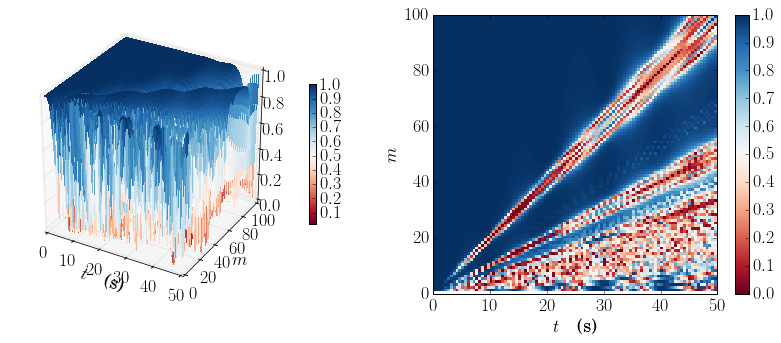

In [16]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

Increasing coupling strength ($g = 0.1\omega$),

In [12]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]

H = sum(H_list)

In [13]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(m_list), len(T_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_approx(H_list, m, T) * psi0
        rho_0f = U(H, T) * psi0
        Z[i1, i2] = fidelity(rho_af, rho_0f)

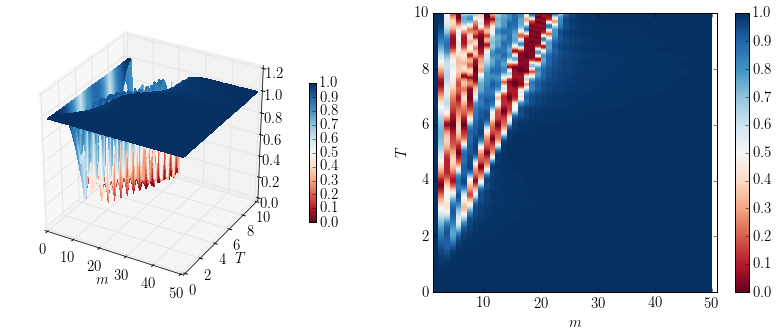

In [19]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(X, Y, Z.T, rstride=1, cstride=1, cmap=cm.RdBu,
                     linewidth=0, antialiased=False, vmin=0, vmax=1)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$m$')
ax0.set_ylabel(r'$T$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(X, Y, Z.T, cmap=cm.RdBu, vmin=0, vmax=1)
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$m$')
ax1.set_ylabel(r'$T$')
ax1.set_xlim([1, M+1]);

Increasing coupling strength ($g = 0.2\omega$),

In [31]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.2 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [32]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

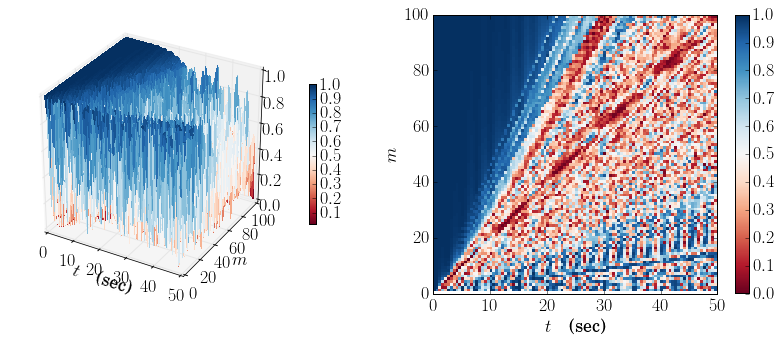

In [33]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

In [37]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into five parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * a.dag() * sm.dag(),
          g * a * sm,
          g * a * sm.dag(),
          g * a.dag() * sm]
H = sum(H_list)

In [38]:
fidelity?

### References

[1] H. F. Trotter, <a href="http://www.ams.org/jourcgi/jour-getitem?pii=S0002-9939-1959-0108732-6">Proc. Amer. Math. Soc. <b>10</b>, 545 (1959)</a>.<br>
[2] M. Suzuki, <a href="http://link.springer.com/10.1007/BF01609348">Commun. Math. Phys. <b>51</b>, 183 (1976)</a>.<br>
[3] M. A. Nielsen and I. L. Chuang, <i>Quantum computation and quantum information</i>, Cambridge university press (2010).